In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


# Para ler dados de ações do yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

from datetime import datetime

# As ações de tecnologia que usaremos para esta análise
tech_list = ['AMZN']

# Configuração horários de término e início para coleta de dados
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AMZN]
company_name = ["AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,company_name
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN,
Date,,,,,,,
2024-11-18 00:00:00+00:00,201.699997,201.699997,204.669998,200.949997,204.149994,36512500,AMAZON
2024-11-19 00:00:00+00:00,204.610001,204.610001,205.300003,198.779999,199.330002,31197900,AMAZON
2024-11-20 00:00:00+00:00,202.880005,202.880005,203.130005,199.449997,202.979996,32769000,AMAZON
2024-11-21 00:00:00+00:00,198.380005,198.380005,203.490005,195.750000,203.490005,58800000,AMAZON
2024-11-22 00:00:00+00:00,197.119995,197.119995,199.259995,196.750000,198.250000,31530800,AMAZON
2024-11-25 00:00:00+00:00,201.449997,201.449997,201.949997,199.000000,199.279999,40685700,AMAZON
2024-11-26 00:00:00+00:00,207.860001,207.860001,208.000000,201.789993,201.899994,41673700,AMAZON
2024-11-27 00:00:00+00:00,205.740005,205.740005,207.639999,205.050003,206.979996,28061600,AMAZON


In [2]:
AMZN.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,144.515970,144.515970,146.311712,142.664785,144.546597,6.892723e+07
std,31.249686,31.249686,31.391507,31.128275,31.322852,3.387640e+07
min,81.820000,81.820000,83.480003,81.301498,82.075500,1.762600e+07
25%,118.775002,118.775002,120.614502,116.660000,118.606003,4.679845e+07
50%,152.764496,152.764496,154.600006,150.534500,152.927505,6.060400e+07
75%,168.979996,168.979996,170.706757,166.723747,168.591003,8.214215e+07
max,214.100006,214.100006,215.899994,210.880005,214.160004,3.113460e+08


In [3]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2019-12-02 00:00:00+00:00 to 2024-12-02 00:00:00+00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AMZN)  1259 non-null   float64
 1   (Close, AMZN)      1259 non-null   float64
 2   (High, AMZN)       1259 non-null   float64
 3   (Low, AMZN)        1259 non-null   float64
 4   (Open, AMZN)       1259 non-null   float64
 5   (Volume, AMZN)     1259 non-null   int64  
 6   (company_name, )   1259 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.7+ KB


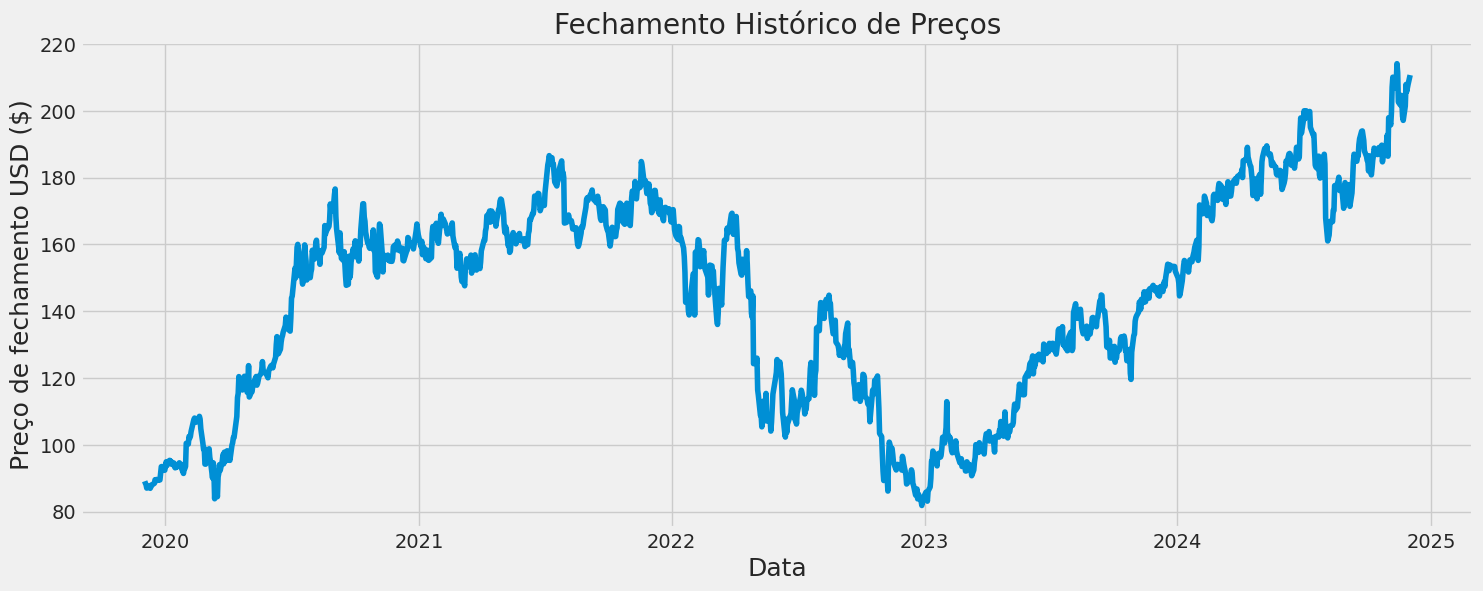

In [4]:
plt.figure(figsize=(16,6))
plt.title('Fechamento Histórico de Preços')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Preço de fechamento USD ($)', fontsize=18)
plt.show()

In [5]:
# Crie um novo dataframe apenas com a coluna 'Close'
data = df['Close']

# Converti o dataframe em um array numpy
dataset = data.values

# Obtem o número de linhas para treinar o modelo
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1197

In [6]:
# Dimensionando os dados
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.05488359],
       [0.05048383],
       [0.04697989],
       ...,
       [0.93680072],
       [0.95305408],
       [0.97422051]])

In [7]:
# Criei o conjunto de dados de treinamento dimensionado
train_data = scaled_data[0:int(training_data_len), :]

# Divida os dados em conjuntos de dados x_train e y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Converta x_train e y_train em matrizes numpy
x_train, y_train = np.array(x_train), np.array(y_train)

# Remodelar os dados
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# x_train.shape

[array([0.05488359, 0.05048383, 0.04697989, 0.03934081, 0.04354401,
       0.04275402, 0.03886077, 0.04245538, 0.04684383, 0.04707437,
       0.05020035, 0.05830811, 0.05580209, 0.05892046, 0.05673569,
       0.05919263, 0.05776007, 0.08783262, 0.08822194, 0.07956227,
       0.07992136, 0.09888492, 0.09017612, 0.10072571, 0.10223013,
       0.09660193, 0.100034  , 0.09327182, 0.09634867, 0.08808588,
       0.0852812 , 0.09129878, 0.08630178, 0.09661323, 0.09489719,
       0.09380856, 0.08513759, 0.07255065, 0.08196627, 0.08376173,
       0.08855455, 0.14073175, 0.13902327, 0.15621029, 0.15250604,
       0.15642196, 0.16740245, 0.18805188, 0.19443604, 0.19791351,
       0.19408451, 0.18841472, 0.19627683, 0.20177654, 0.1953054 ,
       0.17371106, 0.14094723, 0.12713185, 0.12972104, 0.09370272])]
[0.09349485716658679]

[array([0.05488359, 0.05048383, 0.04697989, 0.03934081, 0.04354401,
       0.04275402, 0.03886077, 0.04245538, 0.04684383, 0.04707437,
       0.05020035, 0.05830811, 0.05

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Constrói o modelo LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compila o modelo
# Como estamos trabalhando com previsão de séries temporais,
# O Adam é um otimizador adaptativo que ajusta a taxa de aprendizado e melhora a convergência do modelo, sendo ideal para modelos LSTM.
# A função de perda MSE é adequada para tarefas de regressão e mede o erro entre os valores previstos e os reais, ajudando a ajustar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treina o modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1137/1137 ━━━━━━━━━━━━━━━━━━━━ 66s 55ms/step - loss: 0.0073


In [9]:
# Cria o conjunto de dados de teste
# Cria um novo array contendo valores escalonados do índice 1543 a 2002
test_data = scaled_data[training_data_len - 60: , :]

# Crie os conjuntos de dados x_test e y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Converta os dados em um array numpy
x_test = np.array(x_test)

# Remodelar os dados
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Obtenha os valores de preços previstos dos modelos
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Obtenha a raiz do erro quadrático médio (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step


6.171964496610555

In [10]:
# Salvar o modelo Keras
model.save('lstm_model.h5')

# Salvar o scaler com joblib
import joblib
joblib.dump(scaler, 'scaler.pkl')

from google.colab import files

# Baixar o modelo e o scaler para o seu computador
files.download('lstm_model.h5')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid

<ipython-input-14-fb6554dbe6ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Ticker,AMZN,Predictions
Date,,
2024-09-05 00:00:00+00:00,177.889999,172.965210
2024-09-06 00:00:00+00:00,171.389999,173.648758
2024-09-09 00:00:00+00:00,175.399994,173.175720
2024-09-10 00:00:00+00:00,179.550003,173.139206
2024-09-11 00:00:00+00:00,184.520004,174.070923
...,...,...
2024-11-25 00:00:00+00:00,201.449997,196.799362
2024-11-26 00:00:00+00:00,207.860001,196.217529
2024-11-27 00:00:00+00:00,205.740005,197.525879
